<a href="https://colab.research.google.com/github/k-ichrak/Cardiovascular_Disease_Prediction/blob/main/Ichrak_khaldi(Cardiovascular_Disease_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Presentation: Cardiovascular Disease Prediction Using Neural Networks**

---

#### **1. Introduction**
- **Topic**: Cardiovascular Disease (CVD) Prediction
- **Goal**: The goal is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease.
- **Significance**: CHD is a leading cause of death globally. Early diagnosis can improve treatment outcomes and save lives.

---

#### **2. Dataset**
- **Source**:The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes.
- **Features**:
age, gender, education, currentSmoker, cigsPerDay, BPMeds, diabetes,prevalentStroke, History of stroke, prevalentHyp, totChol, sysBP, diaBP, BMI,heartRate, glucose.


---

#### **3. Model Overview**
- **Architecture**: Neural Network (Feedforward Multilayer Perceptron)
  - **Input Layer**: Represents patient health features.
  - **Hidden Layers**: Fully connected layers with activation functions (ReLU).
  - **Output Layer**: Single neuron with sigmoid activation for binary classification.
- **Loss Function**: Binary Cross-Entropy Loss.
- **Optimizer**: Adam Optimizer.

---

#### **4. Workflow**
1. **Data Acquisition**: Import the Framingham Heart Disease Dataset.  
2. **Data Preprocessing**: Handle missing values, scale features, and encode categorical variables.  
3. **Data Exploration**: Analyze feature correlations and visualize data distributions.  
4. **Model Development**:  
   - Build and train a neural network.  
   - Evaluate using metrics like accuracy, precision, and recall.  
5. **Prediction**: Predict 10-year CHD risk and validate performance.  
6. **Interface**: This project includes the interface for a more comprehensive presentation.

---

#### **5. Results**
- **Accuracy**: 97%
- **Precision**: 93%
-**Recall**: 91%
- **ROC-AUC**: 0.92



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [ ]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.1 MB/s eta 0:00:00




DATA ACQUISITION


In [ ]:
from google.colab import files
files.upload()


Saving framingham.csv to framingham.csv


{'framingham.csv': b'male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD\r\n1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0\r\n0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0\r\n1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0\r\n0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1\r\n0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85,0\r\n0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99,0\r\n0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1\r\n0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78,0\r\n1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0\r\n1,43,1,1,30,0,0,1,0,225,162,107,23.61,93,88,0\r\n0,50,1,0,0,0,0,0,0,254,133,76,22.91,75,76,0\r\n0,43,2,0,0,0,0,0,0,247,131,88,27.64,72,61,0\r\n1,46,1,1,15,0,0,1,0,294,142,94,26.31,98,64,0\r\n0,41,3,0,0,1,0,1,0,332,124,88,31.31,65,84,0\r\n0,39,2,1,9,0,0,0,0,226,114,64,22.35,85,NA,0\r\n0,38,2,1,20,0,0,1,0,221,140,90,21.35,95,70,1\r\n1,48,3,1,10,0,0,1,0,232,138,90,22.37,64,72,0\r\n0,46,2,1,20,0,0,0,0,29

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('framingham.csv')

# Display the first few rows of the DataFrame
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape


(4240, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
##  configure l'option d'affichage pour les nombres à virgule flottante dans pandas.
pd.set_option('display.float_format',lambda x : '%.2f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
age,4240.00,49.58,8.57,32.00,42.00,49.00,56.00,70.00
education,4135.00,1.98,1.02,1.00,1.00,2.00,3.00,4.00
currentSmoker,4240.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
cigsPerDay,4211.00,9.01,11.92,0.00,0.00,0.00,20.00,70.00
BPMeds,4187.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
prevalentStroke,4240.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
prevalentHyp,4240.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
diabetes,4240.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00
totChol,4190.00,236.70,44.59,107.00,206.00,234.00,263.00,696.00


Filtering Data

In [ ]:
import missingno as msno

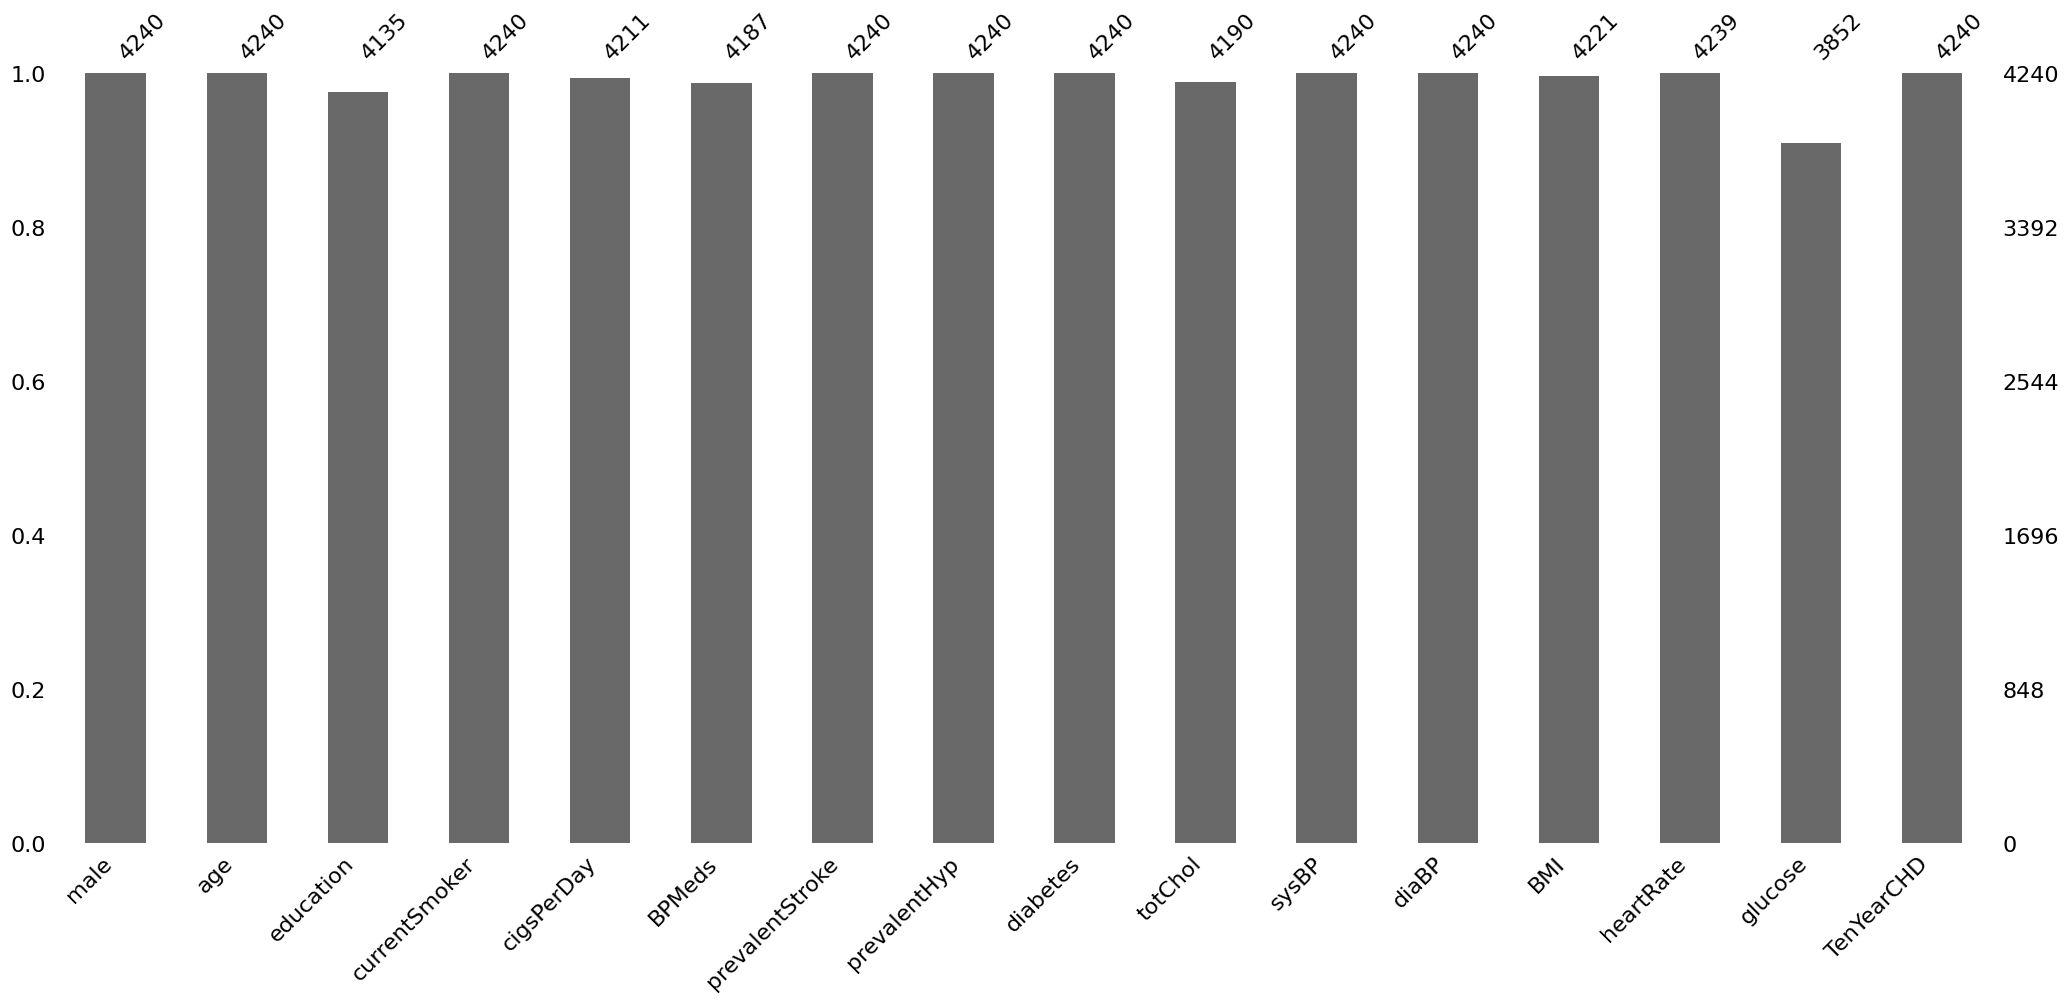

In [ ]:
## identifying missing value
msno.bar(df)
plt.show()

In [ ]:
## Filling the missing values with the mean of the column
df['glucose'] =df['glucose'].fillna(df['glucose']).mean()
df['education'] =df['education'].fillna(df['education']).mean()

In [ ]:
## drop rows with >10% missingness
df = df.dropna()

### CHecking for duplicates

In [ ]:
#check for duplication
df.duplicated().sum()

0

# **DATA EXPLORATION**

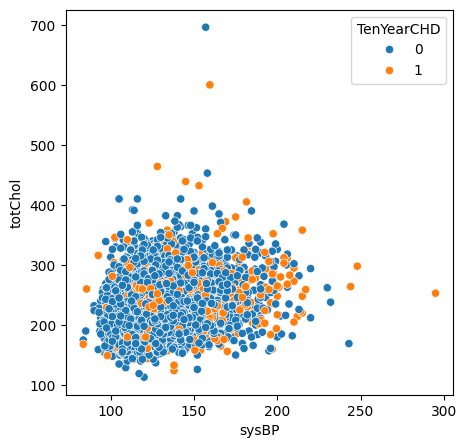

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = df, x='sysBP',y='totChol', hue='TenYearCHD')
plt.show()

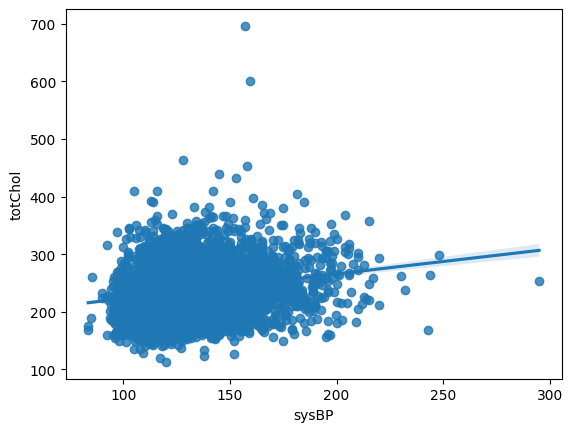

In [ ]:
#To see if there is any linear relationship between the variables (depending on the angle:close to horizental=weak relationship)
sns.regplot(data=df, x='sysBP', y='totChol')
plt.show()

# **Generate Machine Learning model**

# 1.Split into X and Y

In [ ]:
x= df.drop('TenYearCHD',axis=1)
x.shape


(4090, 15)

In [ ]:
y= df['TenYearCHD']
y.shape

(4090,)

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape[1]

15

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, roc_auc_score

# Build the Neural Network model
from keras.layers import BatchNormalization

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Add another layer
    Dense(1, activation='sigmoid')
])


#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=500,
                    batch_size=64,
                    verbose=1)

Epoch 1/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9576 - loss: 0.1182 - precision: 0.8901 - recall: 0.8301 - val_accuracy: 0.7634 - val_loss: 1.3433 - val_precision: 0.1923 - val_recall: 0.1402
Epoch 2/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9664 - loss: 0.0987 - precision: 0.9111 - recall: 0.8551 - val_accuracy: 0.7313 - val_loss: 1.3733 - val_precision: 0.2326 - val_recall: 0.2804
Epoch 3/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9626 - loss: 0.1070 - precision: 0.8889 - recall: 0.8574 - val_accuracy: 0.7557 - val_loss: 1.2896 - val_precision: 0.2268 - val_recall: 0.2056
Epoch 4/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9664 - loss: 0.0833 - precision: 0.8917 - recall: 0.8697 - val_accuracy: 0.7511 - val_loss: 1.3508 - val_precision: 0.1889 - val_recall: 0.1589
Epoch 5/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1051 - precision: 0.8761 - recall: 0.8634 - val_accuracy: 0.7969 - val_loss: 1.2589

In [ ]:
print("Training Accuracy: ", history.history['accuracy'][-1])  # Last training accuracy value
print("Validation Accuracy: ", history.history['val_accuracy'][-1])  # Last validation accuracy value
print("Training Precision: ", history.history['precision'][-1])
print("Training Recall: ", history.history['recall'][-1])

Training Accuracy:  0.9774550795555115
Validation Accuracy:  0.7572519183158875
Training Precision:  0.9329758882522583
Training Recall:  0.9109947681427002


# **Interactive Interface**

In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import numpy as np


# Prediction function
def tenyearchd_predict(*inputs):
    try:
        # Convert inputs into a NumPy array
        input_array = np.array(inputs, dtype=float).reshape(1, -1)
        # Make a prediction
        prediction = model.predict(input_array)
        # Extract probability or prediction value
        probability = prediction[0][0]  # Assuming the model outputs a single probability
        return f"The predicted probability is: {probability:.2f}"  # Format as a percentage
    except ValueError as ve:
        return f"Input Error: {str(ve)}"
    except Exception as e:
        return f"Unexpected Error: {str(e)}"

# Define individual input fields
inputs = [
    gr.Number(label="male (1 if Yes and 0 if No)"),
    gr.Number(label="Age"),
    gr.Number(label="Education"),
    gr.Number(label="Current Smoker (1 for Yes, 0 for No)"),
    gr.Number(label="Cigarettes Per Day"),
    gr.Number(label="BP Medications (1 for Yes, 0 for No)"),
    gr.Number(label="Prevalent Stroke (1 for Yes, 0 for No)"),
    gr.Number(label="Prevalent Hypertension (1 for Yes, 0 for No)"),
    gr.Number(label="Diabetes (1 for Yes, 0 for No)"),
    gr.Number(label="Total Cholesterol (mg/dL)"),
    gr.Number(label="Systolic Blood Pressure (mmHg)"),
    gr.Number(label="Diastolic Blood Pressure (mmHg)"),
    gr.Number(label="BMI"),
    gr.Number(label="Heart Rate (bpm)"),
    gr.Number(label="Glucose (mg/dL)"),
]


# Create Gradio interface
description = """
### Tenyearchd Predictor
Enter the values for each parameter in the respective fields below.
The model will predict the likelihood based on your inputs.
"""

iface = gr.Interface(
    fn=tenyearchd_predict,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction"),
    title="Tenyearchd Predictor",
    description=description,
    live=True,  # Optional: Update output as user types (if prediction is lightweight)
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a09368bf598592ab11.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
